# SMOOTHED regression between sea level height and the nearest wind stress data point for observational data

This regression can either be performed using observational or model (cmip6) data.
When observational or cmip6 data is used, functions containing respectively 'obs' or 'cmip6' should be used.

The regression is performed using smoothed time series.

For each sea level datapoint, a wind stress data point located nearest to the sea level point is used to perform a regression.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/Wind_contribution/Smoothed analysis/code')

import import_data as imprt
import regression as regres
import figures as figs

data_type = 'era5'
model = 'NearestPoint'

window = 21

#### Import and plot tide gauge data

In [2]:
# Open data file
tg_data = imprt.import_obs_slh_data(window = window)

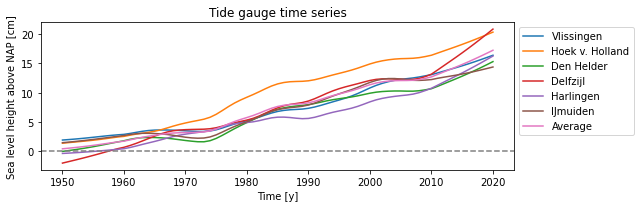

In [3]:
figs.plot_tg_data(tg_data)

#### Import and plot nearby wind data

In [4]:
wind_data_era5 = imprt.import_obs_wind_data(model = model, data_type = data_type, window = window)

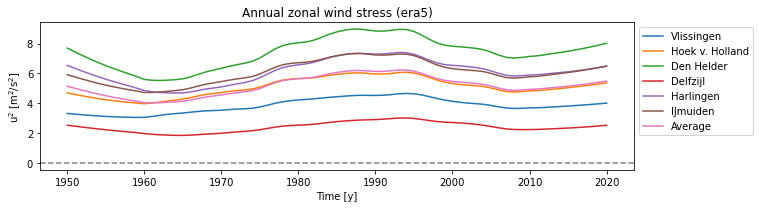

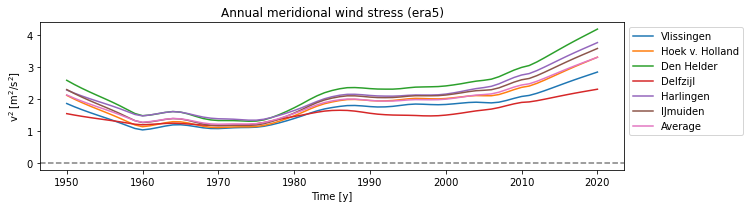

In [5]:
figs.plot_obs_wind_data(wind_data_era5, model, data_type = data_type)

### Perform regression

In [60]:
results_era5, timeseries_era5, significance_era5 = regres.regression_obs(wind_data_era5, tg_data, wind_model = model, data_type = data_type)

ValueError: X has 1 features, but LinearRegression is expecting 3 features as input.

In [7]:
results_era5

,R$^2$,R$^2_{wind}$,R$^2_{u^2}$,R$^2_{v^2}$,RMSE,constant,u$^2$,v$^2$,trend
station,,,,,,,,,
Vlissingen,0.993633,0.368552,0.167255,0.795018,0.352673,7.460060,-0.746484,1.032806,3.872431
Hoek v. Holland,0.995786,0.747907,0.319589,0.693143,0.381731,10.102493,0.594267,0.679889,4.991532
Den Helder,0.980683,0.770240,0.300063,0.726102,0.609834,6.402498,0.270686,0.948685,3.416653
Delfzijl,0.981560,0.669296,0.168119,0.718368,0.799244,7.602202,-0.094934,0.600815,5.366352
Harlingen,0.983071,0.602066,0.156766,0.730027,0.575543,5.893476,-0.310044,0.936057,3.742644
IJmuiden,0.959889,0.669351,0.198682,0.714443,0.880703,7.179520,-0.118845,0.902004,3.615794
Average,0.995217,0.732397,0.238135,0.730806,0.336680,7.431267,0.004921,0.851344,4.147851


In [58]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression as linr

<AxesSubplot:xlabel='time'>

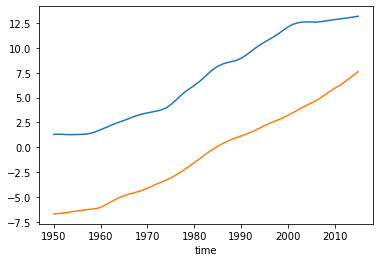

In [56]:
tg_data['Average'].loc[1950:2015].plot()
timeseries_era5['Average', 'total'].loc[1950:2015].plot()

In [62]:
wind_data_era5['Average']

,u$^2$,v$^2$
time,,
1950,5.144607,2.132625
1951,5.006310,2.030616
1952,4.872329,1.936982
1953,4.743975,1.849649
1954,4.623191,1.766571
...,...,...
2016,5.209017,2.948674
2017,5.271487,3.043009
2018,5.339678,3.133935


In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [78]:
regr = linr()

regr.fit(wind_data_era5['Average'].loc[1950:2015], tg_data['Average'].loc[1950:2015])
predict = regr.predict(wind_data_era5['Average'].loc[1950:2015])

In [79]:
r2_score(predict, tg_data['Average'].loc[1950:2015])

0.5483466332510387

In [ ]:
linr().score(timeseries_era5['Average'].loc[1950:2015], tg_data['Average'].loc[1950:2015])

In [57]:
r2_score(tg_data['Average'].loc[1950:2015], timeseries_era5['Average', 'wind total'].loc[1950:2015])

-2.5448353962574113

In [47]:
tg_data['Average'].loc[1950:2015]

time
1950     1.294449
1951     1.319121
1952     1.293778
1953     1.270610
1954     1.271145
          ...    
2011    12.898866
2012    12.962726
2013    13.027792
2014    13.096630
2015    13.172902
Name: Average, Length: 66, dtype: float64

In [48]:
timeseries_era5['Average']

,u$^2$,v$^2$,trend,total,wind total
time,,,,,
1950,-0.000130,0.381344,-7.083804,-6.702590,0.381215
1951,-0.001161,0.218692,-6.881410,-6.663879,0.217531
1952,-0.002160,0.069393,-6.679016,-6.611783,0.067233
1953,-0.003117,-0.069858,-6.476621,-6.549596,-0.072975
1954,-0.004018,-0.202326,-6.274227,-6.480571,-0.206344
...,...,...,...,...,...
2016,0.000351,1.682526,6.274227,7.957104,1.682877
2017,0.000817,1.832942,6.476621,8.310380,1.833759
2018,0.001325,1.977924,6.679016,8.658265,1.979249


In [9]:
significance_era5

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
reggression_contributor,,,,,,,
u$^2$,True,True,True,True,True,True,True
v$^2$,True,True,True,True,True,True,True
trend,True,True,True,True,True,True,True
total,True,True,True,True,True,True,True
wind total,True,True,True,True,True,True,True


#### Plot regression results

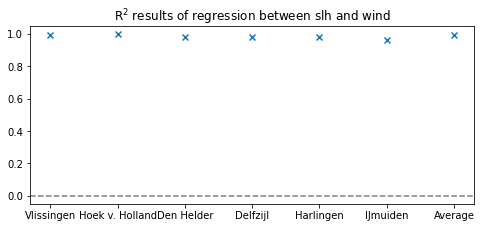

In [10]:
figs.plot_obs_result_per_station(results_era5, 'R$^2$', model, data_type)

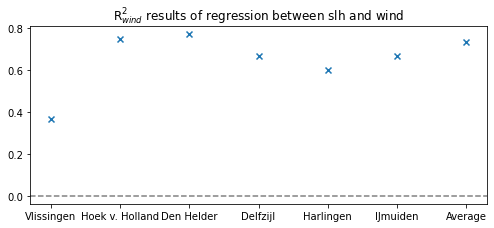

In [11]:
figs.plot_obs_result_per_station(results_era5, 'R$^2_{wind}$', model, data_type)

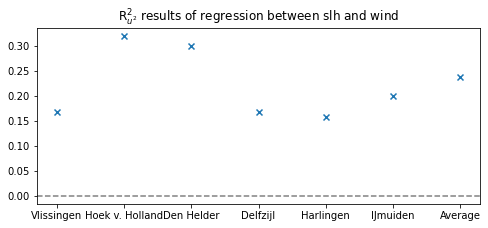

In [12]:
figs.plot_obs_result_per_station(results_era5,'R$^2_{u^2}$', model, data_type)

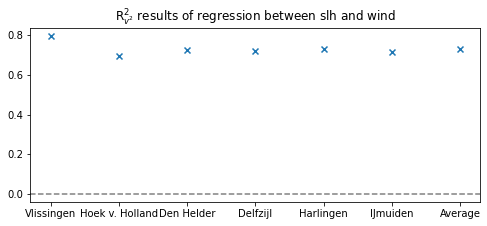

In [13]:
figs.plot_obs_result_per_station(results_era5, 'R$^2_{v^2}$', model, data_type)

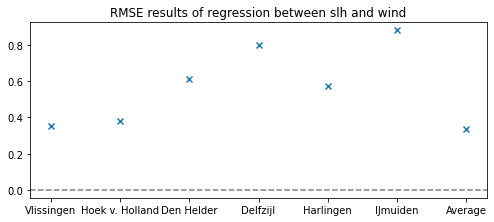

In [14]:
figs.plot_obs_result_per_station(results_era5, 'RMSE', model, data_type)

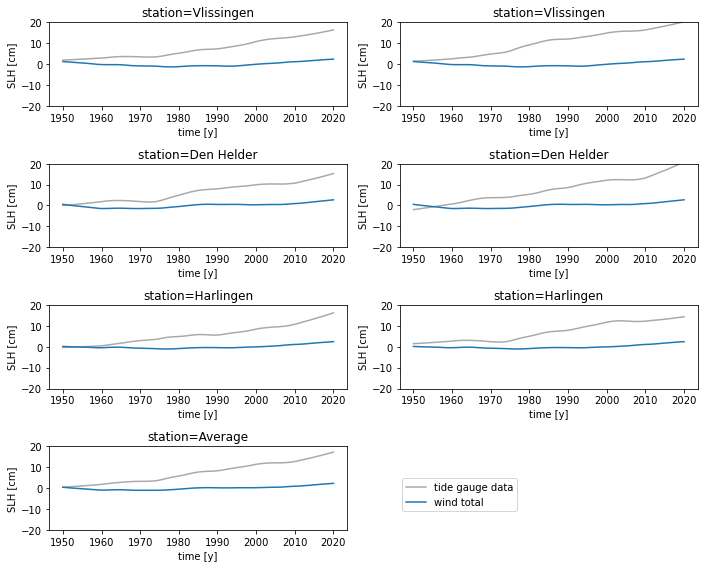

In [15]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['wind total'], model, data_type)

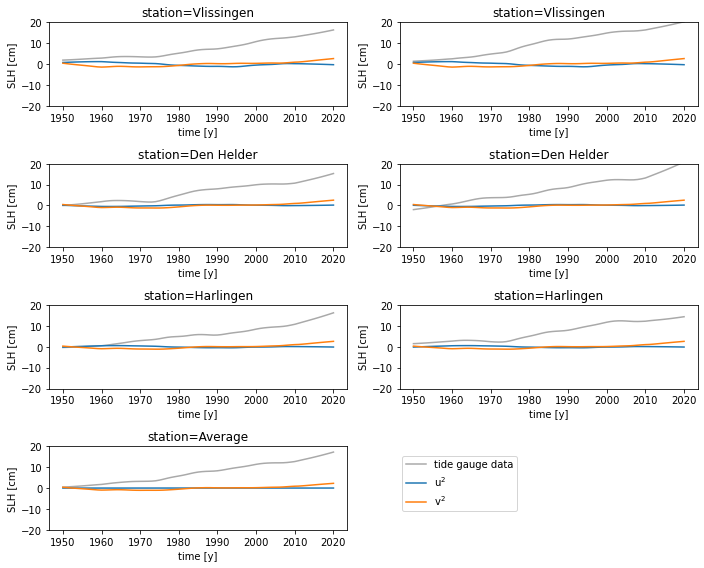

In [16]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['u$^2$', 'v$^2$'], model, data_type)

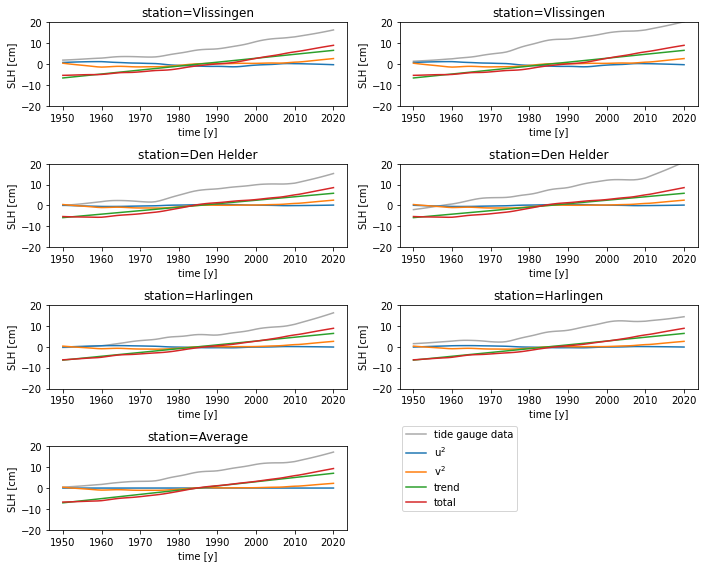

In [17]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['u$^2$', 'v$^2$', 'trend', 'total'], model, data_type)

#### Plot trends

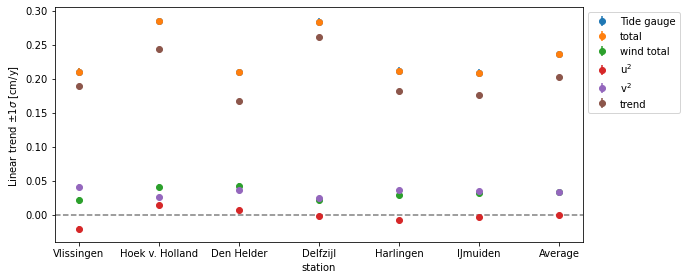

In [18]:
figs.plot_obs_trends_timeseries_per_station(tg_data, timeseries_era5, ['total', 'wind total', 'u$^2$', 'v$^2$', 'trend'], model, data_type)

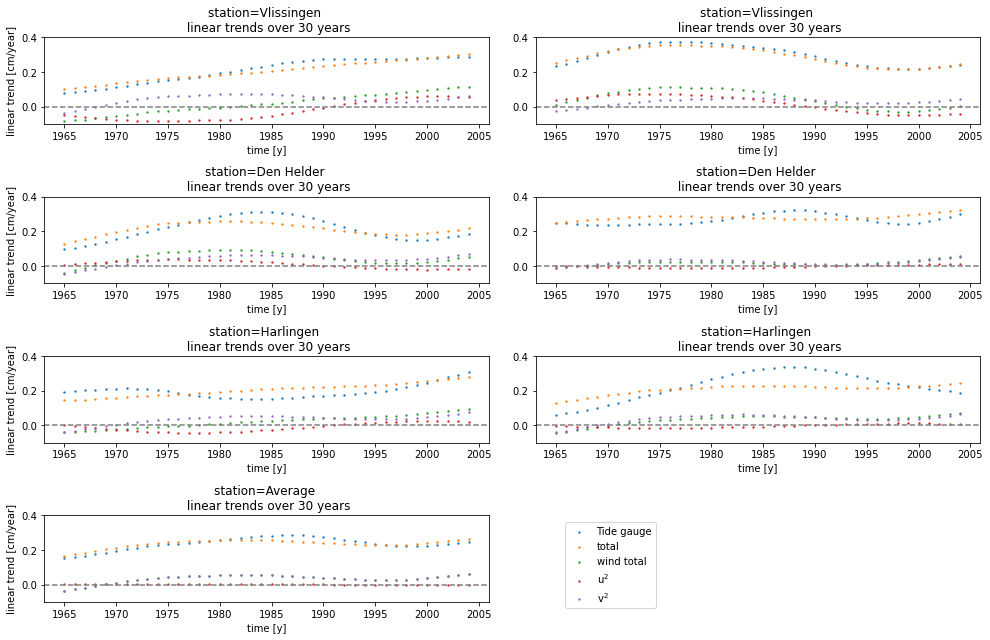

In [19]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries_era5, ['total', 'wind total', 'u$^2$', 'v$^2$'], 30, model, data_type, errorbar = False)

## 20cr observational data

In [20]:
data_type = '20cr'

#### Import and plot tide gauge data

In [21]:
# Open data file
tg_data = imprt.import_obs_slh_data(data_type = data_type)

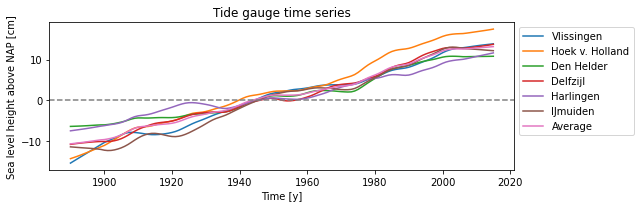

In [22]:
figs.plot_tg_data(tg_data)

#### Import and plot nearby wind data

In [23]:
wind_data_20cr = imprt.import_obs_wind_data(model = model, data_type = data_type)

In [24]:
wind_data_20cr

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
,u$^2$,u$^2$,u$^2$,u$^2$,u$^2$,u$^2$,u$^2$,v$^2$,v$^2$,v$^2$,v$^2$,v$^2$,v$^2$,v$^2$
time,,,,,,,,,,,,,,
1836,1.957357,2.626462,2.570963,1.627225,2.570963,1.918824,2.196257,1.099481,0.567494,0.232271,0.772200,0.232271,0.765234,0.615231
1837,1.942052,2.659938,2.643895,1.649329,2.643895,1.930713,2.231188,1.138342,0.667553,0.364084,0.816740,0.364084,0.814982,0.697765
1838,1.929240,2.698461,2.721964,1.673264,2.721964,1.945779,2.269873,1.178382,0.769450,0.498494,0.862565,0.498494,0.866040,0.782243
1839,1.918493,2.739646,2.802023,1.697785,2.802023,1.962753,2.310360,1.218574,0.871871,0.634121,0.908869,0.634121,0.917428,0.867500
1840,1.909981,2.782973,2.883488,1.722832,2.883488,1.981474,2.352343,1.258295,0.973660,0.769515,0.955012,0.769515,0.968419,0.952502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,2.692987,5.975391,7.857784,3.385797,7.857784,3.527828,5.227414,2.871902,3.500778,3.550067,2.765044,3.550067,2.757318,3.116025
2012,2.675810,5.958261,7.802473,3.270043,7.802473,3.465509,5.171169,2.966728,3.625855,3.676619,2.855102,3.676619,2.845219,3.219940


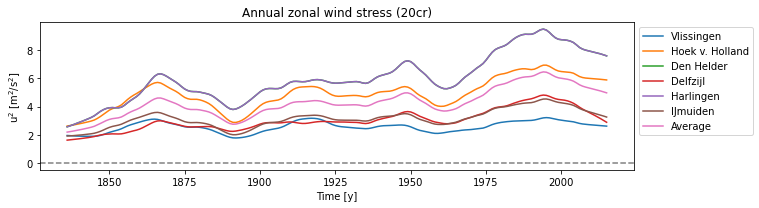

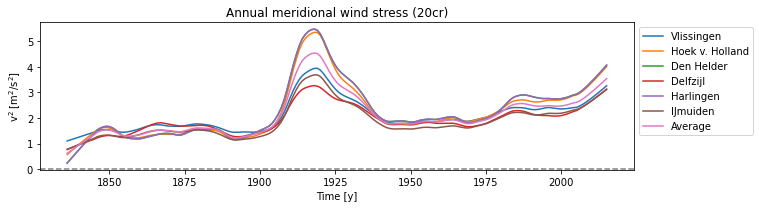

In [25]:
figs.plot_obs_wind_data(wind_data_20cr, model=model, data_type = data_type)

### Perform regression

In [26]:
results_20cr, timeseries_20cr, significance_20cr = regres.regression_obs(wind_data_20cr, tg_data, wind_model = model, data_type = data_type)

In [27]:
results_20cr

,R$^2$,R$^2_{wind}$,R$^2_{u^2}$,R$^2_{v^2}$,RMSE,constant,u$^2$,v$^2$,trend
station,,,,,,,,,
Vlissingen,0.988791,0.042219,0.183592,0.003071,0.852945,-5.096353,0.254295,-0.494541,11.347297
Hoek v. Holland,0.996581,0.686487,0.686819,0.013787,0.535415,-3.782856,1.433143,0.001282,11.551362
Den Helder,0.970776,0.810429,0.800485,0.001733,0.996006,-2.526500,1.302862,-0.154394,6.748196
Delfzijl,0.991595,0.619426,0.652769,0.043591,0.693271,-4.468812,0.850939,0.433690,9.794023
Harlingen,0.984766,0.288766,0.776968,0.029837,0.650795,-2.547740,0.392606,0.664217,6.937987
IJmuiden,0.983729,0.108010,0.558070,0.004366,1.056028,-5.664044,0.315197,-0.591299,11.492537
Average,0.994597,0.722646,0.714651,0.007115,0.540012,-4.064353,0.773362,-0.030547,9.635819


In [28]:
timeseries_20cr

Vlissingen                                            Hoek v. Holland  \
          u$^2$     v$^2$      trend      total wind total           u$^2$   
time                                                                         
1836  -0.397385  0.765932 -19.545208 -19.176660   0.368547       -3.024994   
1837  -0.407418  0.735798 -19.326825 -18.998446   0.328379       -2.980617   
1838  -0.415817  0.704750 -19.108443 -18.819510   0.288933       -2.929549   
1839  -0.422862  0.673584 -18.890061 -18.639340   0.250721       -2.874952   
1840  -0.428442  0.642782 -18.671679 -18.457338   0.214340       -2.817515   
...         ...       ...        ...        ...        ...             ...   
2011   0.084855 -0.608469  18.671679  18.148065  -0.523613        1.414506   
2012   0.073595 -0.682000  18.890061  18.281656  -0.608405        1.391798   
2013   0.061960 -0.757317  19.108443  18.413086  -0.695357        1.365864   
2014   0.049684 -0.834377  19.326825  18.542132  -0.784693        1.336087   
2015   0.037223 -0.913567  19.545208  18.668863  -0.876345        1.305391   

                                                 ...  IJmuiden            \
         v$^2$      trend      total wind total  ...     u$^2$     v$^2$   
time                                             ...                       
1836 -0.002010 -19.896699 -22.923703  -3.027004  ... -0.619407  0.995683   
1837 -0.001888 -19.674390 -22.656894  -2.982504  ... -0.613493  0.950784   
1838 -0.001763 -19.452080 -22.383393  -2.931312  ... -0.605998  0.904703   
1839 -0.001639 -19.229771 -22.106361  -2.876591  ... -0.597555  0.858324   
1840 -0.001514 -19.007461 -21.826491  -2.819029  ... -0.588243  0.812304   
...        ...        ...        ...        ...  ...       ...       ...   
2011  0.001567  19.007461  20.423534   1.416073  ...  0.180957 -0.802213   
2012  0.001719  19.229771  20.623288   1.393517  ...  0.149957 -0.881546   
2013  0.001875  19.452080  20.819819   1.367739  ...  0.117703 -0.962269   
2014  0.002033  19.674390  21.012510   1.338120  ...  0.084002 -1.044300   
2015  0.002195  19.896699  21.204285   1.307586  ...  0.049508 -1.128041   

                                        Average                       \
          trend      total wind total     u$^2$     v$^2$      trend   
time                                                                   
1836 -19.795377 -19.419101   0.376276 -1.593886  0.053992 -16.597263   
1837 -19.574199 -19.236908   0.337291 -1.567194  0.051001 -16.411819   
1838 -19.353022 -19.054318   0.298704 -1.537633  0.047940 -16.226374   
1839 -19.131844 -18.871076   0.260769 -1.506696  0.044851 -16.040930   
1840 -18.910667 -18.686606   0.224061 -1.474615  0.041771 -15.855486   
...         ...        ...        ...       ...       ...        ...   
2011  18.910667  18.289411  -0.621256  0.722328 -0.036626  15.855486   
2012  19.131844  18.400256  -0.731589  0.679349 -0.040392  16.040930   
2013  19.353022  18.508456  -0.844566  0.633424 -0.044233  16.226374   
2014  19.574199  18.613901  -0.960298  0.584124 -0.048149  16.411819   
2015  19.795377  18.716844  -1.078533  0.532883 -0.052158  16.597263   

                            
          total wind total  
time                        
1836 -18.137157  -1.539894  
1837 -17.928011  -1.516193  
1838 -17.716067  -1.489693  
1839 -17.502775  -1.461845  
1840 -17.288330  -1.432845  
...         ...        ...  
2011  16.541187   0.685701  
2012  16.679887   0.638957  
2013  16.815565   0.589190  
2014  16.947793   0.535974  
2015  17.077987   0.480724  

[180 rows x 35 columns]

In [29]:
significance_20cr

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
reggression_contributor,,,,,,,
u$^2$,True,True,True,True,True,True,True
v$^2$,False,False,False,True,False,False,False
trend,True,True,True,True,True,True,True
total,True,True,True,True,True,True,True
wind total,True,True,True,True,True,True,True


#### Plot regression results

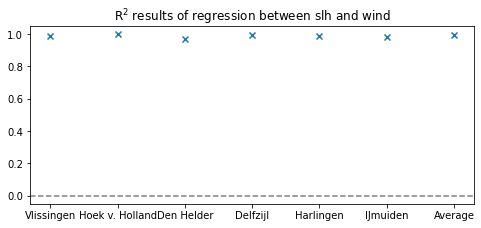

In [30]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2$', model, data_type)

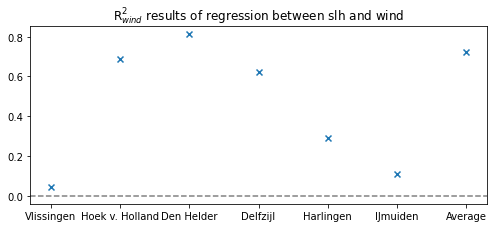

In [31]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2_{wind}$', model, data_type)

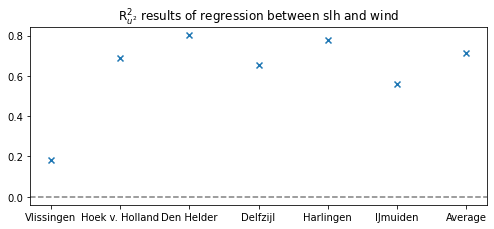

In [32]:
figs.plot_obs_result_per_station(results_20cr,'R$^2_{u^2}$', model, data_type)

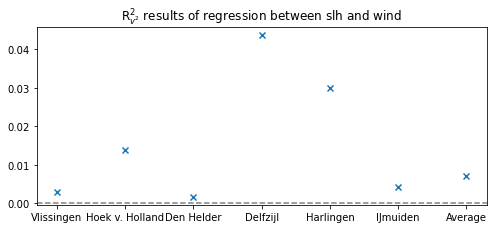

In [33]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2_{v^2}$', model, data_type)

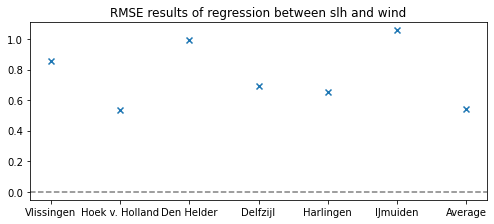

In [34]:
figs.plot_obs_result_per_station(results_20cr, 'RMSE', model, data_type)

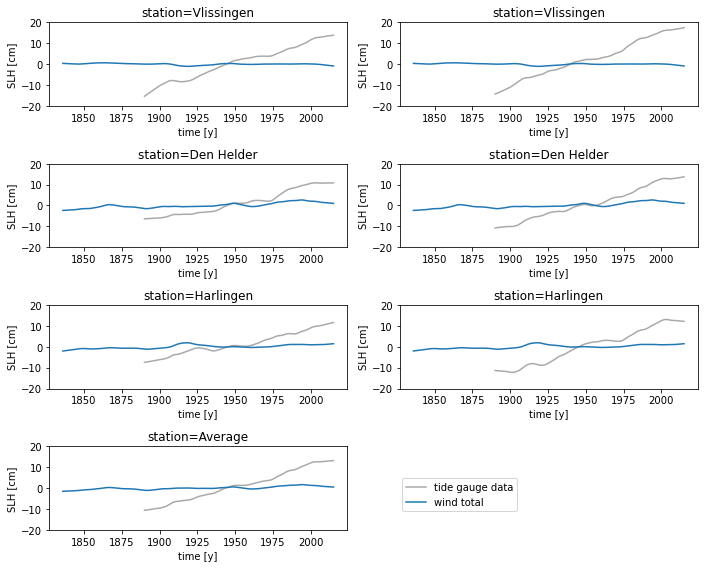

In [35]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['wind total'], model, data_type)

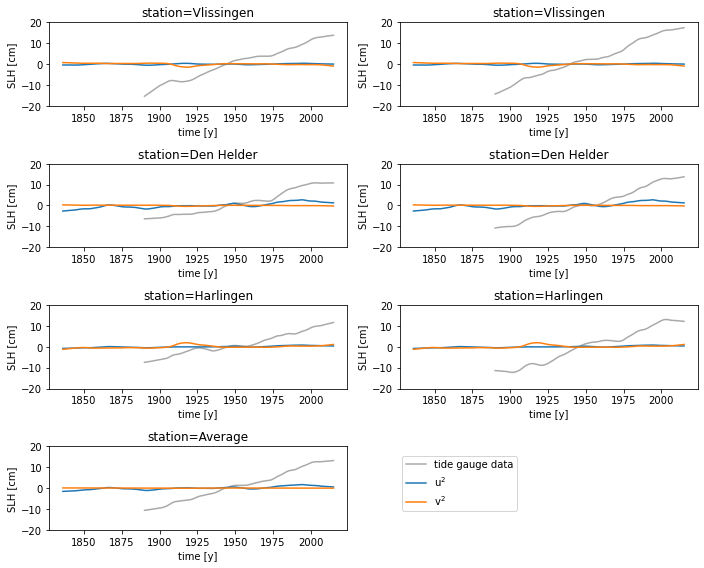

In [36]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['u$^2$', 'v$^2$'], model, data_type)

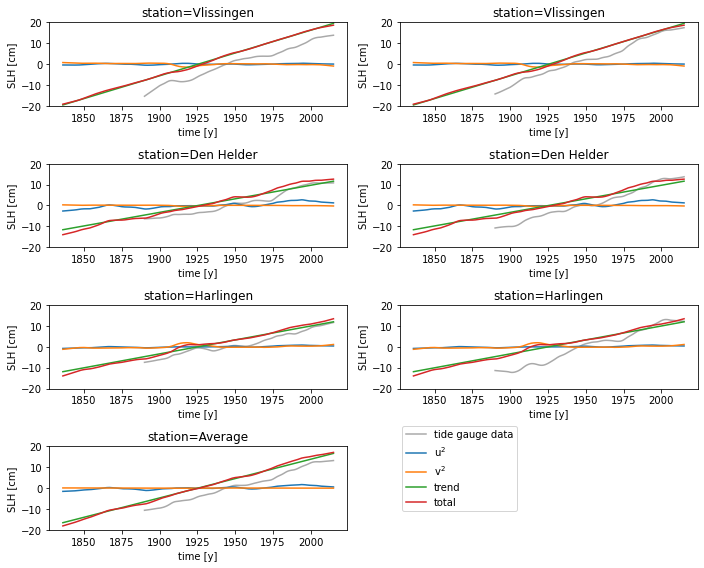

In [37]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['u$^2$', 'v$^2$', 'trend', 'total'], model, data_type)

#### Plot trends

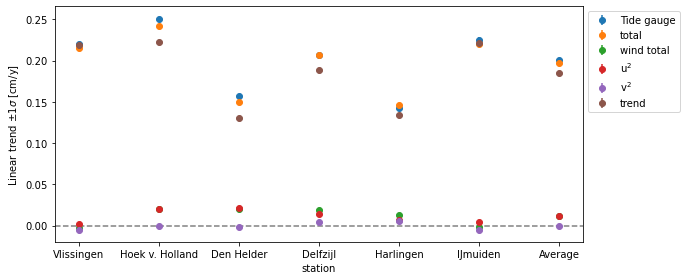

In [38]:
figs.plot_obs_trends_timeseries_per_station(tg_data, timeseries_20cr, ['total', 'wind total', 'u$^2$', 'v$^2$', 'trend'], model, data_type)

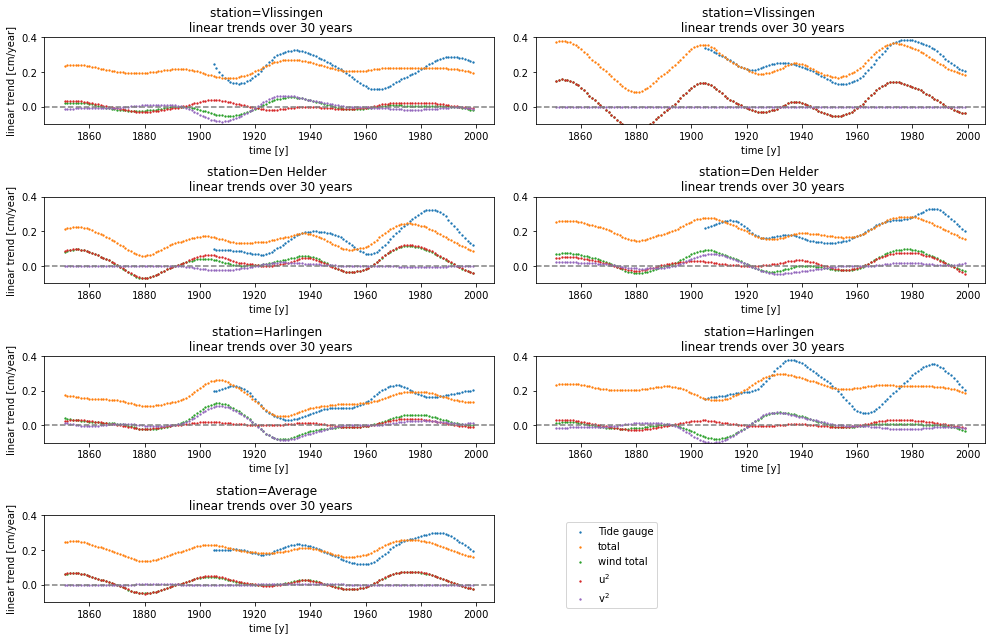

In [39]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries_20cr, ['total', 'wind total', 'u$^2$', 'v$^2$'], 30, model, data_type, errorbar = False)

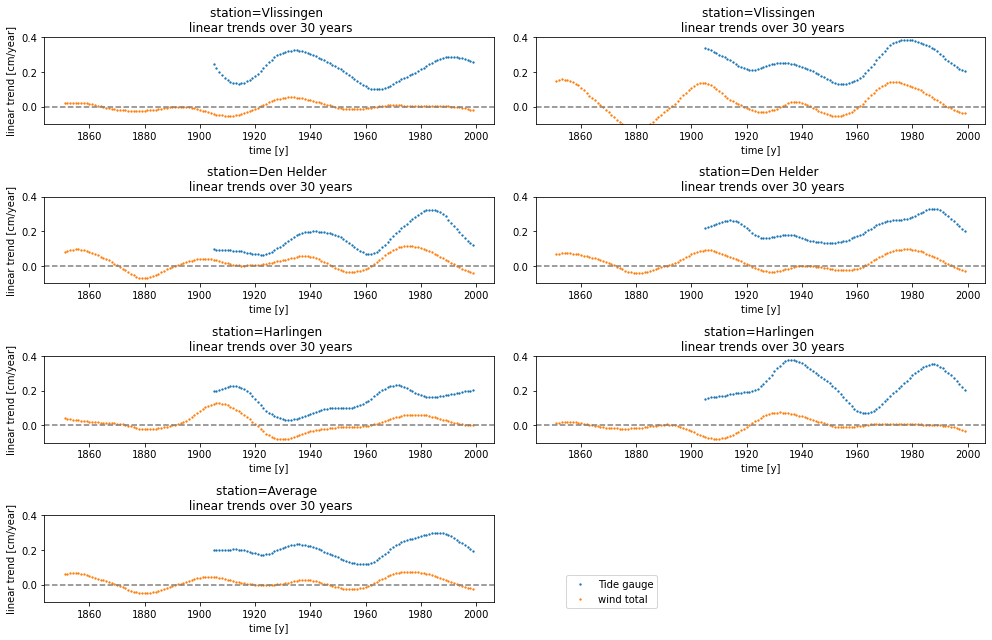

In [40]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries_20cr, ['wind total'], 30, model, data_type, errorbar = False)